In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
x= df.iloc[ : , :-1].values
y = df.iloc[ : ,  4 ].values


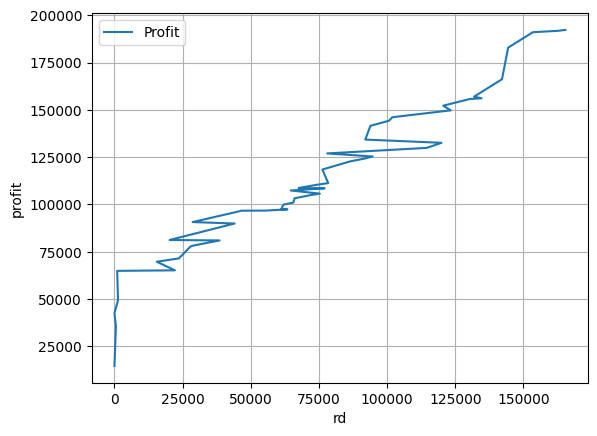

In [31]:
df.plot(x="R&D Spend"  , y="Profit"  )

plt.xlabel('rd')
plt.ylabel('profit')
plt.grid(True)
plt.show()

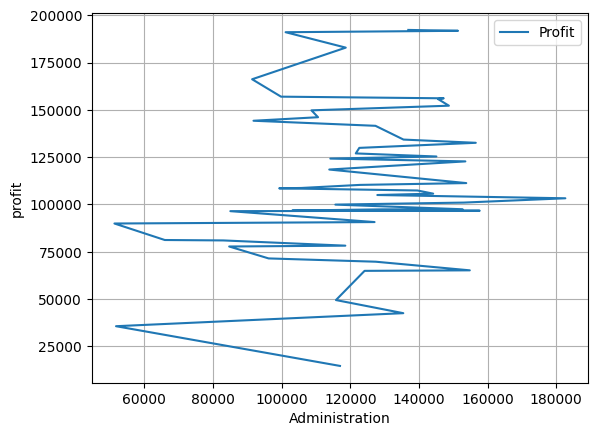

In [32]:
df.plot(x="Administration"  , y="Profit"  )

plt.xlabel('Administration')
plt.ylabel('profit')
plt.grid(True)
plt.show()

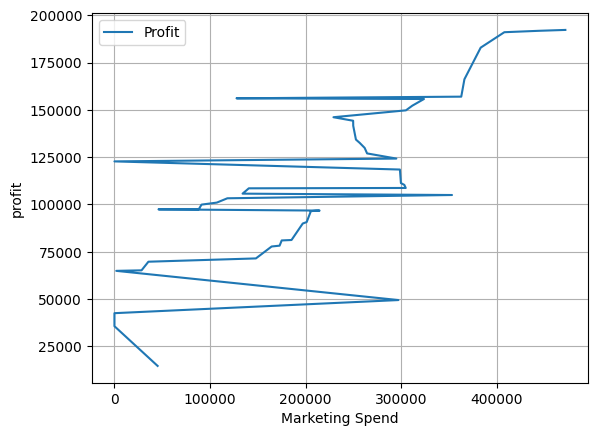

In [15]:
df.plot(x="Marketing Spend"  , y="Profit"  )

plt.xlabel('Marketing Spend')
plt.ylabel('profit')
plt.grid(True)
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming x is your feature matrix (NumPy array or DataFrame)
# Step 1: Encode the categorical column (column 3) using LabelEncoder
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])

# Step 2: Use ColumnTransformer to apply OneHotEncoder to the specific column
# Specify which column to one-hot encode (column 3 in this case)
ct = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), [3])],  # Apply OneHotEncoder to column 3
    remainder='passthrough'  # Keep the other columns unchanged
)

# Step 3: Transform the data
x = ct.fit_transform(x)

In [36]:
x = x[: , 1:]


In [38]:
from sklearn.model_selection import train_test_split

# Assuming X and Y are your feature matrix and target vector
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [40]:
y_pred = regressor.predict(X_test)

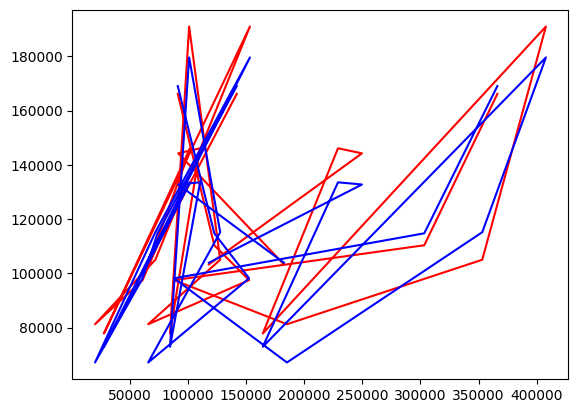

In [42]:
plt.plot(X_test , Y_test , color= "red")
plt.plot(X_test , y_pred , color="blue")


In [44]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.939395591782057
